In [1]:
from ZebraLib.zebralib import zebraperformance as zp
from ZebraLib.zebralib.zebraperformance import *
from ZebraLib.zebralib.zebra_wing import Wing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Zb = Airplane(b=1.8, S=0.684, Af=0.556, c=0.392, CLmax= 1.613, Load=5.5, mv=2.8, CLn=1.111, Swet= 16, Tc=(-0.001, -0.225, 35.225))

Zb1 = Airplane(b=1.8, S=0.684, Af=0.556, c=0.392, CLmax= 1.613, CLn=1.111, mv=2.8, Load= 4, Swet= 16, Tc=(-0.001, -0.225, 35.225))
Zb2 = Airplane(b=1.8, S=0.684, Af=0.556, c=0.392, CLmax= 1.613, CLn=1.111, mv=2.8, Load= 5, Swet= 16, Tc=(-0.001, -0.225, 35.225))  #Constrói os objetos
Zb3 = Airplane(b=1.8, S=0.684, Af=0.556, c=0.392, CLmax= 1.613, CLn=1.111, mv=2.8, Load= 6, Swet= 16, Tc=(-0.001, -0.225, 35.225))
Zb4 = Airplane(b=1.8, S=0.684, Af=0.556, c=0.392, CLmax= 1.613, CLn=1.111, mv=2.8, Load= 7, Swet= 16, Tc=(-0.001, -0.225, 35.225))

## Tipo de arrastos: parasitas e induzidos

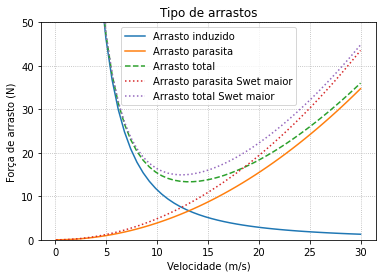

In [3]:
Zb = zp.Airplane()


V = np.linspace(0.1, 30)
Drag_ind = Zb.drag_Force_Induced(V, rho=1.08)
Drag_paras = Zb.drag_Force_Parasitic(V, rho=1.08)

fig, ax = plt.subplots() #criando a figura

#Configurando o gráfico
ax.set(title='Tipo de arrastos', xlabel='Velocidade (m/s)', ylabel='Força de arrasto (N)')  

#Adcionando linhas a figura
ax.plot(V, Drag_ind, label='Arrasto induzido') 
ax.plot(V, Drag_paras, label='Arrasto parasita')
ax.plot(V, Drag_paras+Drag_ind, '--',label='Arrasto total')

Zb.C_D0 = 0.1
Drag_paras = Zb.drag_Force_Parasitic(V, rho=1.08)
ax.plot(V, Drag_paras, linestyle='dotted', label='Arrasto parasita Swet maior')
ax.plot(V, Drag_paras+Drag_ind,  linestyle='dotted', label='Arrasto total Swet maior')

ax.set_ylim(0, 50)
ax.grid(linestyle='dotted')   # Colocar grid na figura
ax.legend() # Mostrar legenda

## Velocidade com a variação da densidade do ar 

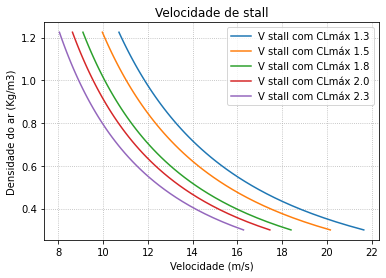

In [4]:
from ZebraLib.zebralib import zebraperformance as zp
from ZebraLib.zebralib.zebra_wing import Wing
import numpy as np
import matplotlib.pyplot as plt

Zb = zp.Airplane()
rho = np.linspace(0.3, 1.225)

fig, ax = plt.subplots()
ax.set(title='Velocidade de stall', xlabel='Velocidade (m/s)', ylabel='Densidade do ar (Kg/m3)')

ax.plot(Zb.veloc_Req(1.3, rho), rho, label='V stall com CLmáx 1.3')
ax.plot(Zb.veloc_Req(1.5, rho), rho, label='V stall com CLmáx 1.5')
ax.plot(Zb.veloc_Req(1.8, rho), rho, label='V stall com CLmáx 1.8')
ax.plot(Zb.veloc_Req(2.0, rho), rho, label='V stall com CLmáx 2.0')
ax.plot(Zb.veloc_Req(2.3, rho), rho, label='V stall com CLmáx 2.3')

plt.grid(linestyle='dotted')
plt.legend()
plt.show()

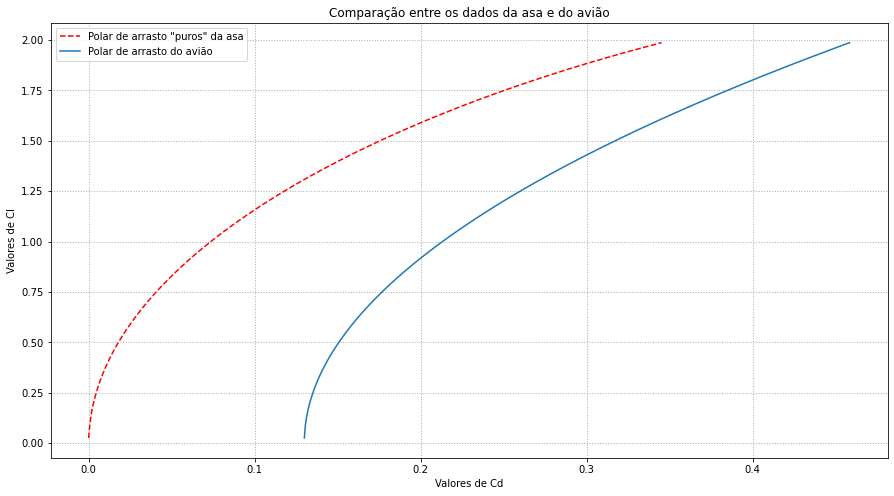

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
g=9.81

Zb = zp.Airplane(Swet=16.272)

#=============================   FIGURA 1 ARRASTO DADOS E INTERPOLAÇÃO DA ASA   =======================

#INTERPOLAÇÃO PARA 500 ELEMENTOS
alpha, Cl, Cd = Zb.import_WingData('D:/UNESP/AeroDesign/Códigos_Python/Dados/dados_asas.xlsx')

#PLOTAGEM
fig, ax = plt.subplots(figsize=(15, 8))
ax.set(title='Comparação entre os dados da asa e do avião', xlabel='Valores de Cd'
        ,ylabel='Valores de Cl')

ax.plot(Cd, Cl,'--',color='red', label='Polar de arrasto "puros" da asa')
ax.plot(Zb.drag_Coef(Cl), Cl, label='Polar de arrasto do avião')

ax.set_xlim()
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

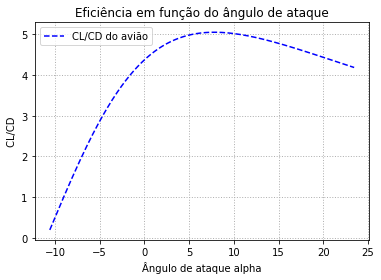

In [6]:
Cd1 = Cd + Zb.C_D0

fig, ax = plt.subplots()
ax.set(title='Eficiência em função do ângulo de ataque', xlabel='Ângulo de ataque alpha'
        , ylabel=' CL/CD ')

ax.plot(alpha, Cl/Cd1,'--', color='blue', label='CL/CD do avião')

ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

## Plotando trações e potências para atmosferas diferentes 


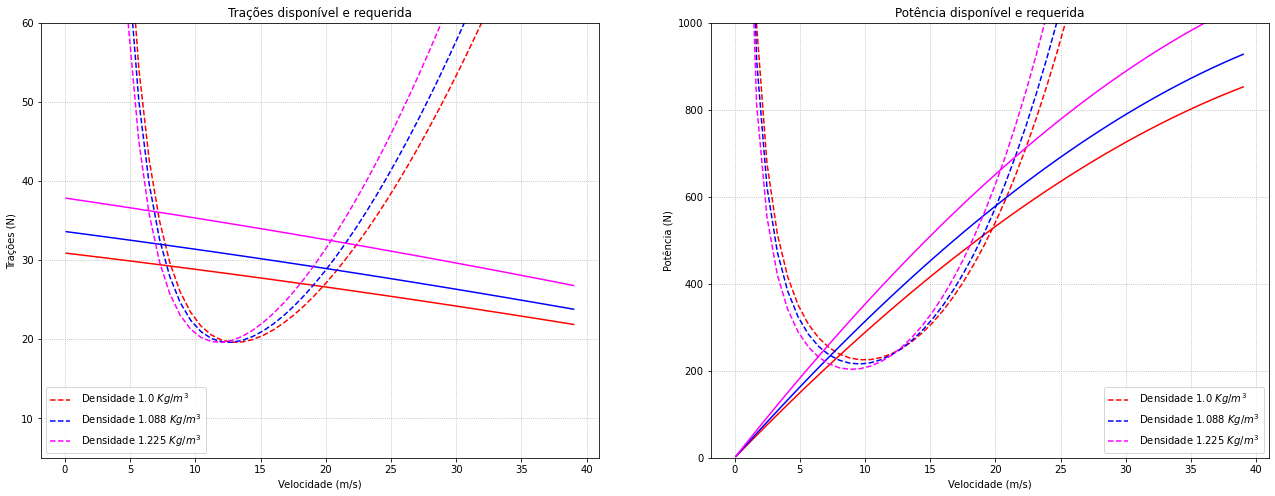

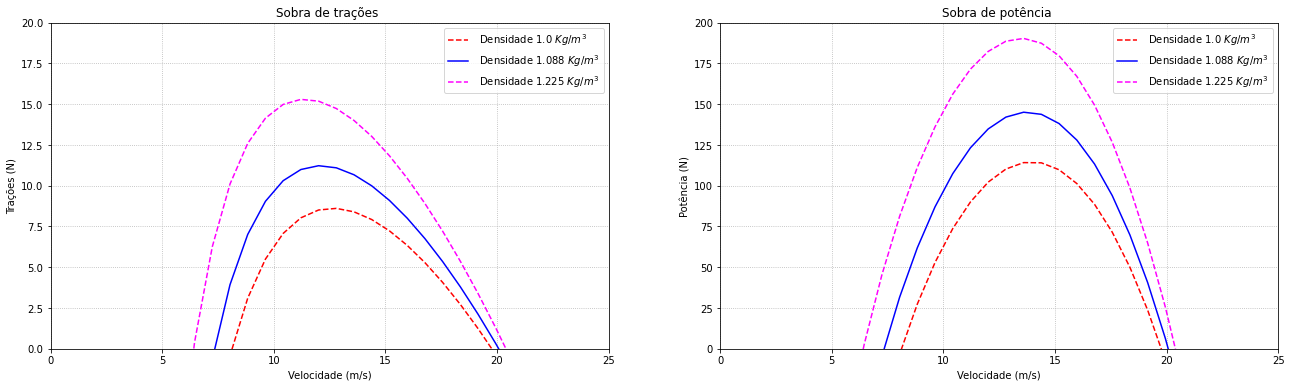

In [49]:
Zb = Airplane(b=1.8, S=0.684, Af=0.556, c=0.392, CLmax= 1.613, Load=5.5, mv=2.8, CLn=1.111, Swet= 16, Tc=(-0.001, -0.225, 35.225))

#Vetor de velocidade e densidades 
V = np.linspace(0.1, 39)
densidades = np.array((1, 1.088, 1.225))

#Colocar estilos no gráfico
Cores = np.array(('red', 'blue', 'fuchsia'))
Lines = np.array(('--','-','--'))
Markers= np.array(('^', 'o', 'd', 'v', '.'))

#Criando o objeto ax (gráfico) com 2 subplots 
fig, (ax, ax2) = plt.subplots(1, 2,  figsize=(22, 8))
ax.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')
ax2.set(title='Potência disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Potência (N)')

fig, ax3 =  plt.subplots(1, 2, figsize=(22, 6))
ax3[0].set(title='Sobra de trações ', xlabel='Velocidade (m/s)', ylabel='Trações (N)')
ax3[1].set(title='Sobra de potência ', xlabel='Velocidade (m/s)', ylabel='Potência (N)')

#iterando para cada avião, cor e line
for dens, cor, line in zip(densidades, Cores, Lines):
    
    #Construir a linha do subplot 1 - Trações
    ax.plot(V, Zb.trac_Available(V, rho=dens),color=cor, ls='-')
    ax.plot(V, Zb.trac_Req(V, rho=dens), color=cor, ls='--', label=f' Densidade {dens} $Kg/m^3$')
    
    #Construir a linha do subplot 2 - Potências
    ax2.plot(V, Zb.pot_Available(V, rho=dens), color=cor, ls='-',)
    ax2.plot(V, Zb.pot_Req(V, rho=dens), color=cor, ls='--',  label=f' Densidade {dens} $Kg/m^3$')
    
    ax3[0].plot(V, Zb.trac_Dif(V, rho=dens), color=cor, ls=line,  label=f' Densidade {dens} $Kg/m^3$')
    ax3[1].plot(V, Zb.pot_Dif(V, rho=dens), color=cor, ls=line,  label=f' Densidade {dens} $Kg/m^3$')
    
ax.set_ylim(5, 60)
ax.legend()
ax.grid(linestyle='dotted')

ax2.set_ylim(0, 1000)
ax2.legend()
ax2.grid(linestyle='dotted')

ax3[0].set_ylim(0, 20)
ax3[0].set_xlim(0, 25)
ax3[0].legend()
ax3[0].grid(linestyle='dotted')

ax3[1].set_ylim(0, 200)
ax3[1].set_xlim(0, 25)
ax3[1].legend()
ax3[1].grid(linestyle='dotted')

## Velocidade max autonomia e alcance

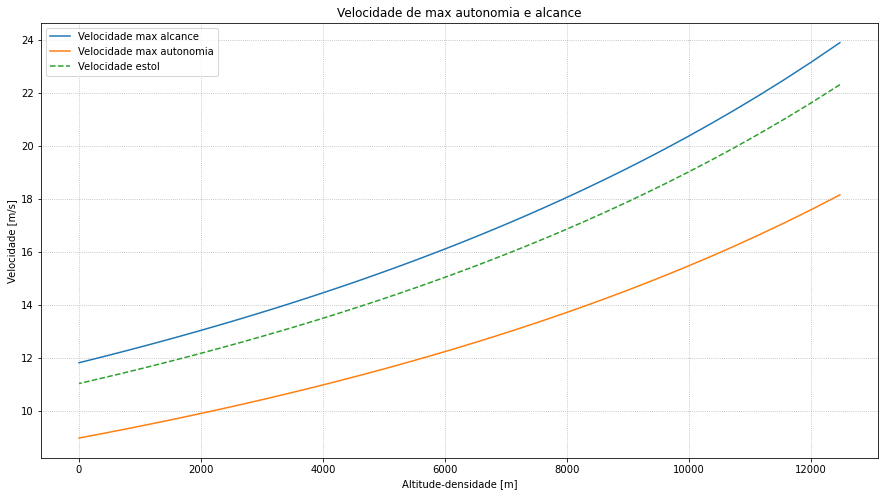

In [20]:
Zb = Airplane(b=1.8, S=0.684, Af=0.556, c=0.392, CLmax= 1.613, Load=5.5, mv=2.8, CLn=1.111, Swet= 16, Tc=(-0.001, -0.225, 35.225))
rho = np.linspace(0.3, 1.225)

fig, ax = plt.subplots(figsize=(15, 8))
ax.set(title='Velocidade de max autonomia e alcance', ylabel='Velocidade [m/s]', xlabel='Altitude-densidade [m]')

ax.plot(iterate_rho2alt(rho), Zb.veloc_Req(Zb.Clmax_Alc, rho), label='Velocidade max alcance')
ax.plot(iterate_rho2alt(rho), Zb.veloc_Req(Zb.Clmax_Aut, rho), label='Velocidade max autonomia')
ax.plot(iterate_rho2alt(rho), Zb.veloc_Req(Zb.CLmax, rho),'--',label='Velocidade estol')
ax.plot()

ax.legend()
ax.grid(linestyle='dotted')

## Razão e ângulo de subida

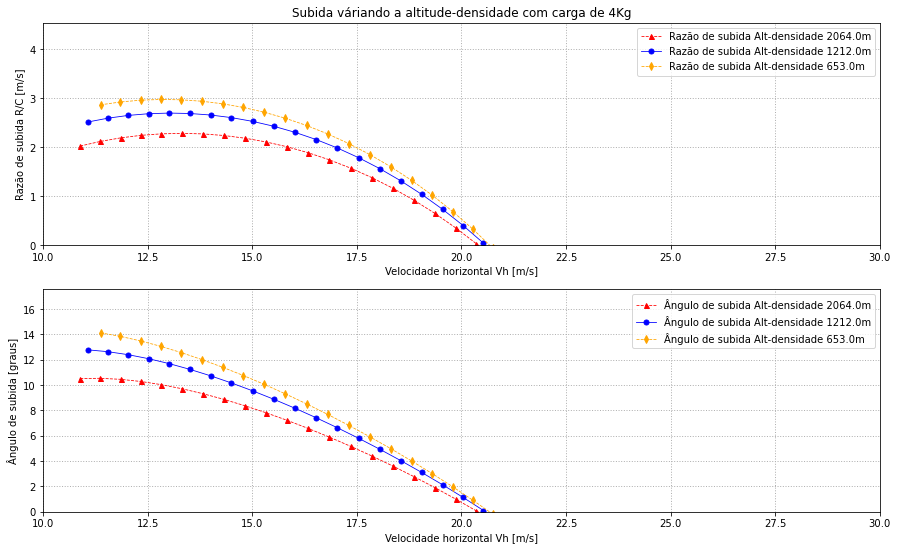

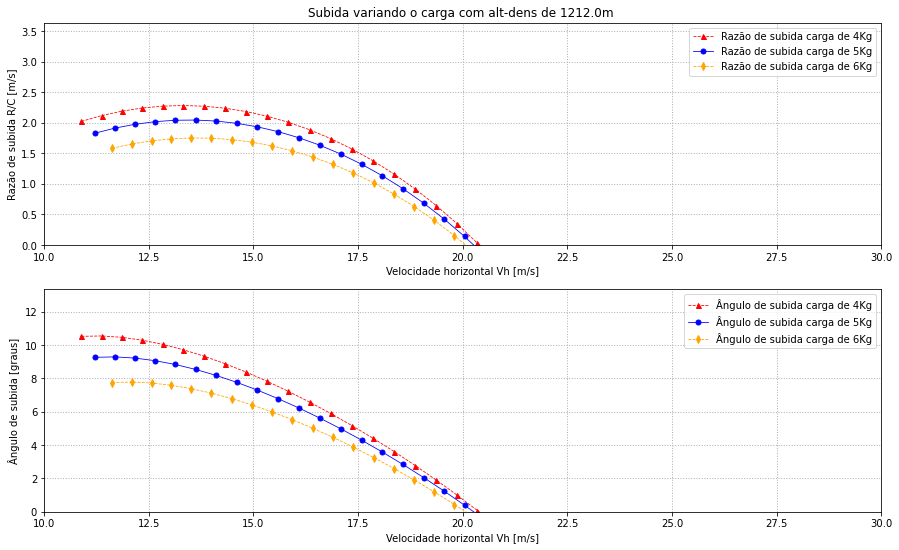

In [21]:
"""
Created on Fri Apr  2 22:48:14 2021

@author: Arthur Chabole
=============================
Este programa cálcula a razão e ângulo de subida x velocidade horizontal Vh usando a biblioteca zerbralib. 
   
 Figura 1 - Fixo a carga padrão de 5.44kg
        Subplot 1 - Razão de subida x Vh variando altitude-densidade
        Subplot 2 - Ângulo de subida x Vh variando altitude-densidade
   
 Figura 2 - Fixo a altitude-densidade de 1212m
        Subplot 1 - Razão de subida x Vh variando carga paga
        Subplot 2 - Ângulo de subida x Vh variando carga paga
        
"""

V = np.linspace(0, 35)
Zbs = np.array((Zb1, Zb2, Zb3))  #Array de objetos

Densidade = [1, 1.0887, 1.15, 1.224978]

Cores = np.array(('red', 'blue', 'orange', 'purple', 'limegreen' ))
Markers= np.array(('^', 'o', 'd', 'v', '.'))
Lines = np.array(('--','-','--','--'))


# ===================================              FIGURA 1        ========================================

#SUBIDA VARIANDO A ALTITUDE-DENSIDADE USANDO 5.44kg CARGA PAGA
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,9))            #Constrói a figura com os subplots

#SUBGRÁFICO 1 DA FIGURA 1
ax.set(title= f'Subida váriando a altitude-densidade com carga de {Zb1.Load}Kg', xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Razão de subida R/C [m/s]')

#SUBGRÁFICO 2 DA FIGURA 1
ax2.set(xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Ângulo de subida [graus]')

for (dens, cor, mark, line, zb) in zip(Densidade, Cores, Markers, Lines, Zbs):
   
    V = np.linspace(zb.veloc_Req(zb.CLmax, rho=dens),35)
    RC, theta = Zb1.rate_Climb(V, dens)          #Cálcula as razões e os ângulos
    Vh = np.array(np.cos(np.deg2rad(theta))*V)   #Cálcula a velocidade horizontal
    
    ax.plot(Vh, RC, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8, 
            label= f'Razão de subida Alt-densidade {round(zp.alt2rho(rho= dens),0)}m' )
    ax2.plot(Vh, theta, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8,
             label= f'Ângulo de subida Alt-densidade {round(zp.alt2rho(rho= dens),0)}m' )

ax.set_ylim(0)
ax.set_xlim(10, 30)
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

ax2.set_ylim(0)
ax2.set_xlim(10, 30)
ax2.legend()
ax2.grid(linestyle='dotted', linewidth=1)

# ===================================             FIGURA 2           ==========================================

#SUBIDA VARIANDO A ALTITUDE-DENSIDADE USANDO 5.44kg CARGA PAGA
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,9))            #Constrói a figura com os subplots

#SUBGRÁFICO 1 DA FIGURA 1
ax.set(title= f'Subida variando o carga com alt-dens de {round(zp.alt2rho(rho= Densidade[1]),0)}m ',
        xlabel='Velocidade horizontal Vh [m/s]', ylabel='Razão de subida R/C [m/s]')

#SUBGRÁFICO 2 DA FIGURA 1
ax2.set(xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Ângulo de subida [graus]')

for (dens, cor, mark, line, zb) in zip(Densidade, Cores, Markers, Lines, Zbs):
    
    V = np.linspace(zb.veloc_Req(zb.CLmax, rho=dens),35)
    RC, theta = zb.rate_Climb(V, dens)          #Cálcula as razões e os ângulos
    Vh = np.array(np.cos(np.deg2rad(theta))*V)  #Cálcula a velocidade horizontal
    
    ax.plot(Vh, RC, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8, 
             label= f'Razão de subida carga de {(zb.Load)}Kg' )
    ax2.plot(Vh, theta, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8,
             label= f'Ângulo de subida carga de {(zb.Load)}Kg' )

ax.set_ylim(0)
ax.set_xlim(10, 30)
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

ax2.set_ylim(0)
ax2.set_xlim(10, 30)
ax2.legend()
ax2.grid(linestyle='dotted', linewidth=1)

## Razão e ângulo de descida

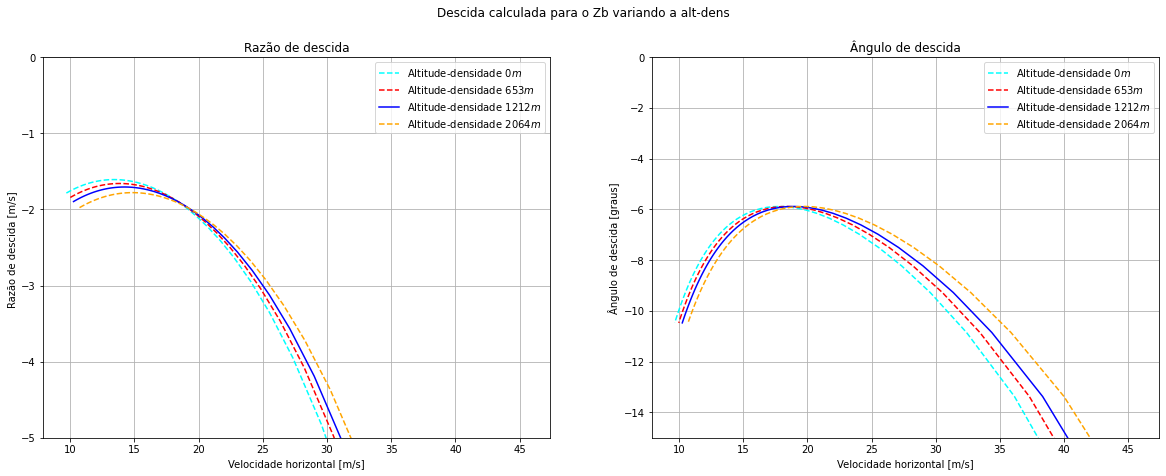

In [22]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  4 09:04:08 2021

@author: Arthur Chabole
====================================
Este programa calcula a razão e ângulo de descida para diferentes configurações de área molhada e alt-dens.

 Figura 1 - Fixo altitude densidade de 1212m e variando setups dos aviões
        Subplot 1 - Razão de decida x velocidade horizontal
        Subplot 2 - Ângulo de descida x Velocidade horizontal
   
 Figura 2 - Fixo o avião Zb e variando alt-dens
        Subplot 1 - Razão de descida x velocidade horizontal
        Subplot 2 - Ângulo de descida x velocidade horizontal

"""
Zb = Airplane(b=1.8, S=0.684, Af=0.556, c=0.392, CLmax= 1.613, Load=5.5, mv=2.8, CLn=1.111, Swet= 3, Tc=(-0.001, -0.225, 35.225))

Cl = np.linspace(0.1,2)

# =======================================        FIGURA 1      ======================================

theta, RS, Vh = Zb.sink_Rate(Cl)
theta2, RS2, Vh2 = Zb.sink_Rate(Cl,1.15)
theta3, RS3, Vh3 = Zb.sink_Rate(Cl,1.0887)
theta4, RS4, Vh4 = Zb.sink_Rate(Cl,1)

#PLOTAGEM SUBPLOT 1 FIGURA 2
fig, (ax3, ax4) = plt.subplots(figsize=(20, 7),nrows=1, ncols=2)
fig.suptitle('Descida calculada para o Zb variando a alt-dens')


ax3.set(title='Razão de descida', xlabel='Velocidade horizontal [m/s]'
      , ylabel='Razão de descida [m/s] ')

ax3.plot(Vh, -RS,'--',color='cyan', label= 'Altitude-densidade 0$m$')
ax3.plot(Vh2, -RS2,'--',color='r', label= f'Altitude-densidade {round(zp.alt2rho(rho=1.15))}$m$')
ax3.plot(Vh3, -RS3,color='b', label= f'Altitude-densidade {round(zp.alt2rho(rho=1.0887))}$m$')
ax3.plot(Vh4, -RS4,'--', color='orange', label= f'Altitude-densidade {round(zp.alt2rho(rho=1))}$m$')

ax3.legend()
ax3.set_ylim(-5,0)
ax3.grid()

#PLOTAGEM SUBPLOT 2 FIGURA 2

ax4.set(title='Ângulo de descida', xlabel='Velocidade horizontal [m/s]'
       , ylabel='Ângulo de descida [graus]')

ax4.plot(Vh, -theta,'--',color='cyan', label= f'Altitude-densidade 0$m$')
ax4.plot(Vh2, -theta2,'--',color='r', label= f'Altitude-densidade {round(zp.alt2rho(rho=1.15))}$m$')
ax4.plot(Vh3, -theta3, color='b', label= f'Altitude-densidade {round(zp.alt2rho(rho=1.0887))}$m$')
ax4.plot(Vh4, -theta4,'--', color='orange', label= f'Altitude-densidade {round(zp.alt2rho(rho=1))}$m$')

ax4.legend()
ax4.set_ylim(-15,0)
ax4.grid()

## Esforço estrutural da asa 

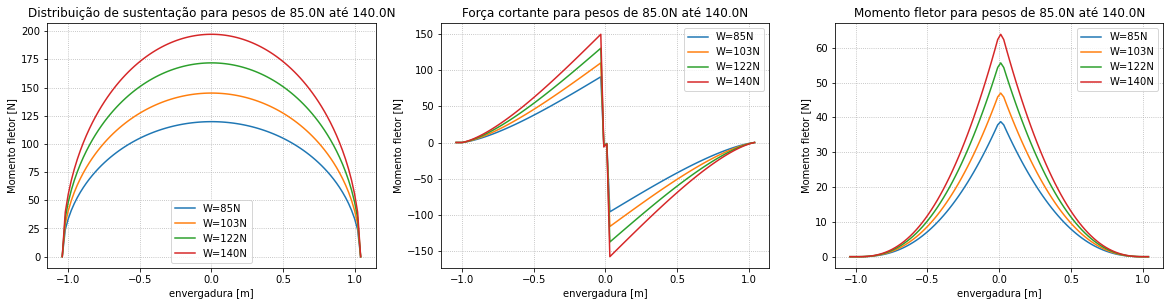

In [11]:
Zb = Wing(S=0.988, b=2.08, CLmax=1.7) # Objeto Asa 

W = np.linspace(85, 140, 4)   # Vetores com vários pesos

#Formatando o gráfico - titulo e nomes dos eixos
fig, ax = plt.subplots(figsize=(20, 4.5),nrows=1, ncols=3, sharex=True)
ax[1].set(title=f'Força cortante para pesos de {W.min()}N até {W.max()}N',
        xlabel='envergadura [m]', ylabel='Momento fletor [N]')
ax[2].set(title=f'Momento fletor para pesos de {W.min()}N até {W.max()}N',
        xlabel='envergadura [m]', ylabel='Momento fletor [N]')
ax[0].set(title=f'Distribuição de sustentação para pesos de {W.min()}N até {W.max()}N',
         xlabel='envergadura [m]', ylabel='Momento fletor [N]')

#Iterando para vários pesos
for w in (W):
    w = round(w)
    L = Zb.distElip_Sust(w)
    ax[0].plot(Zb.y, L, label=f'W={w}N')
    
    V = Zb.força_Cortante(w)
    ax[1].plot(Zb.y, V, label=f'W={w}N')

    M = Zb.moment_Fletor(V)
    ax[2].plot(Zb.y, M, label=f'W={w}N')
    #ax[1].fill_between(Zb.y, M, color='cyan')

for x in ax:
    x.legend()
    x.grid(linestyle='dotted')